# Investigating Household Energy on the PV Grid (Abar)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## The yearly energy graphs are plotted below to spot trends. Some are omitted so far due to insignificant data or meter resets. These will be fixed later.

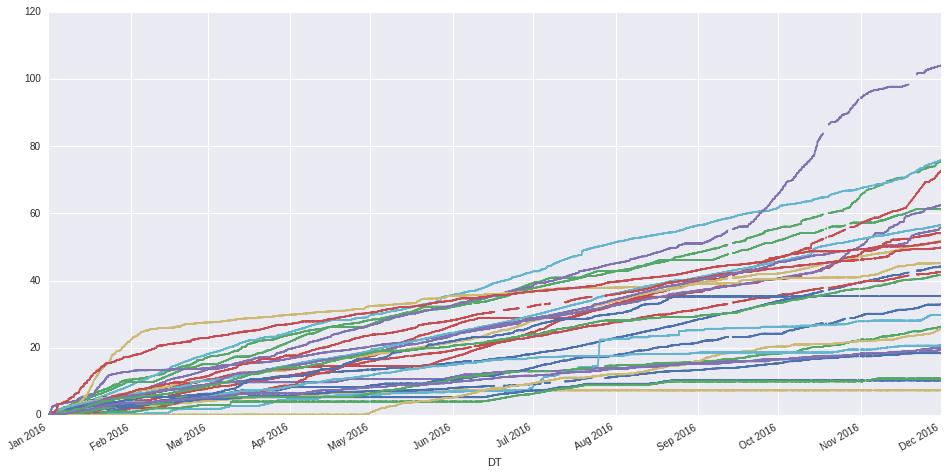

In [2]:
data = pd.read_csv('../Data/aggregated_PV_data.csv', parse_dates = True, index_col = 0)
#data.head()
columns = ['141','202','152','152','153','154','161','162','163','114','124','133','143','151','164','174','194','204','223','224','234']
data = data.drop(columns, 1)
data.plot(legend = False,figsize=(16, 8))

## Looking at the graph some trends seem to emerge in the beginning of the year and towards the end of the year. 

## We can isolate the first few months of the year to analyze the households with larger spikes in energy use. 

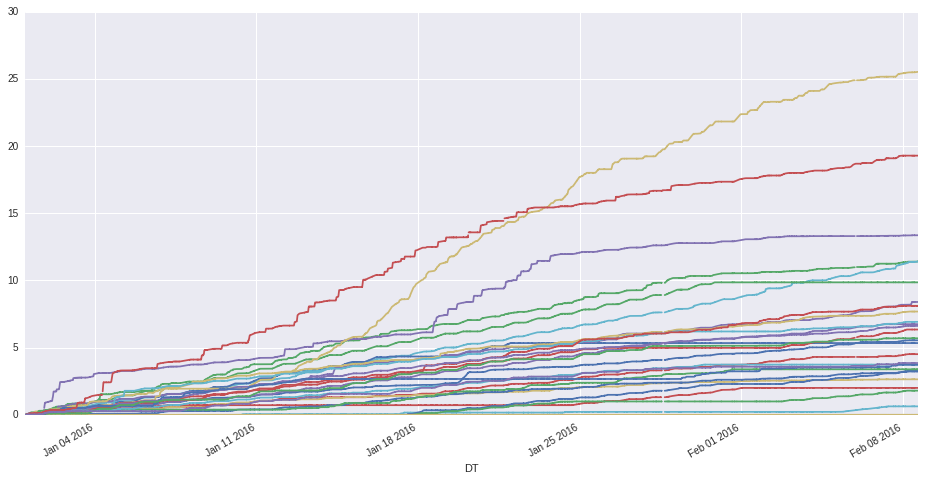

In [3]:
data[:4000].plot(legend = False, figsize=(16, 8))

## We will also isolate the end of the year

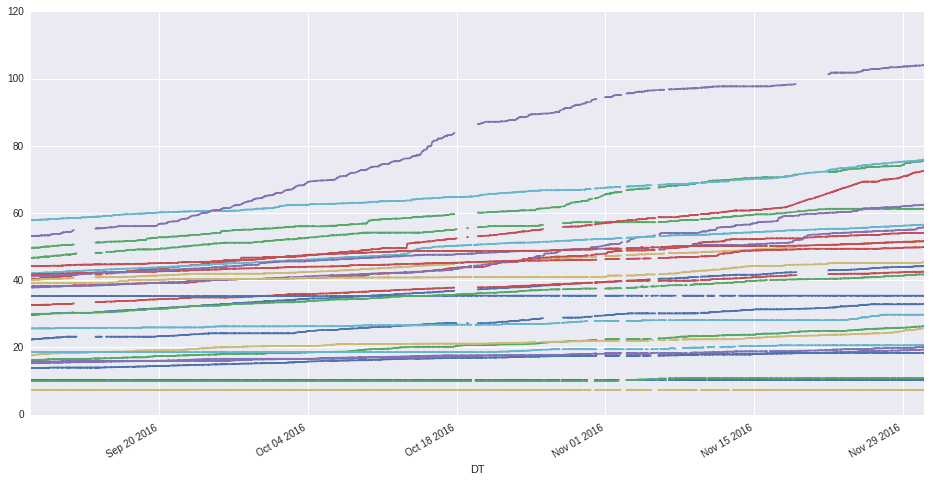

In [4]:
data[26000:].plot(legend = False, figsize=(16, 8))

## A few households seem to have high energy use after PV installation and then flattens out in the middle of the year. There also seems to be at least one household in which we observe increased use towards the end of the year.
#### TODO: Identify these households and analyze further.

In [5]:
# for data visualization: totals. Ignore
#data.tail(1)

## Total yearly energy is calculated by taking the sum of the differences between each data entry
#### Note: We may be losing some values. !Investigate further!

In [6]:
my_columns = ['Household', "Yearly_Energy"]
total_energy = data.resample('D').diff(1).sum()
total_energy = total_energy.reset_index()
total_energy.columns = my_columns
total_energy.head()

/projects/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: 
.resample() is now a deferred operation
You called diff(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  from ipykernel import kernelapp as app


,Household,Yearly_Energy
0,111,42.769118
1,112,72.903701
2,113,41.147242
3,121,19.328312
4,122,7.318052


## We will calculate the average daily energy use by dividing by days in a year.
#### A more precise way of doing this is needed

In [7]:
total_energy['Daily_Energy'] = total_energy['Yearly_Energy'] / 365
total_energy.head()

,Household,Yearly_Energy,Daily_Energy
0,111,42.769118,0.117176
1,112,72.903701,0.199736
2,113,41.147242,0.112732
3,121,19.328312,0.052954
4,122,7.318052,0.020049


In [8]:
# selecting columns to plot
df = total_energy[['Household','Daily_Energy']]

## The bar graph shows the range of each households daily energy use in kWh.

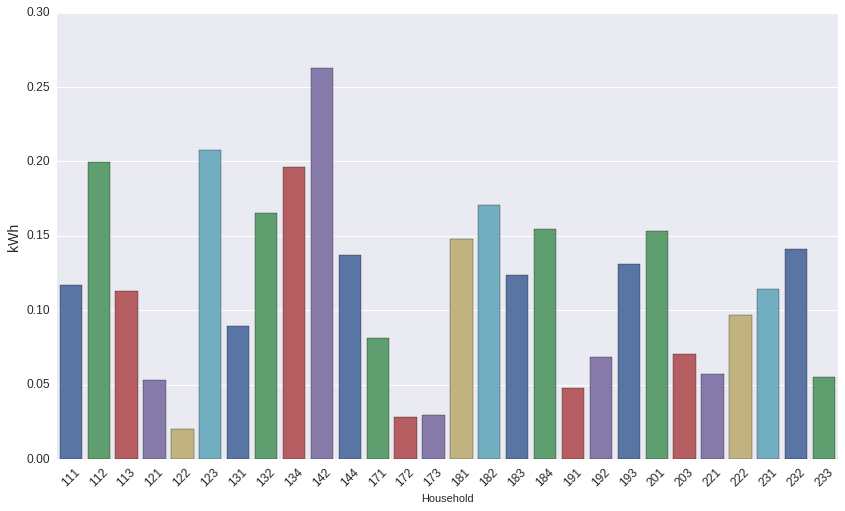

In [9]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=45)
pal = sns.color_palette("deep", 10)
sns.barplot(x='Household', y='Daily_Energy', data=df, palette = pal )
plt.ylabel('kWh', fontsize=14)
plt.tick_params(labelsize=12)


## Alternatively we can view the daily energy as a distribution where the y-axis is the number of occurences.

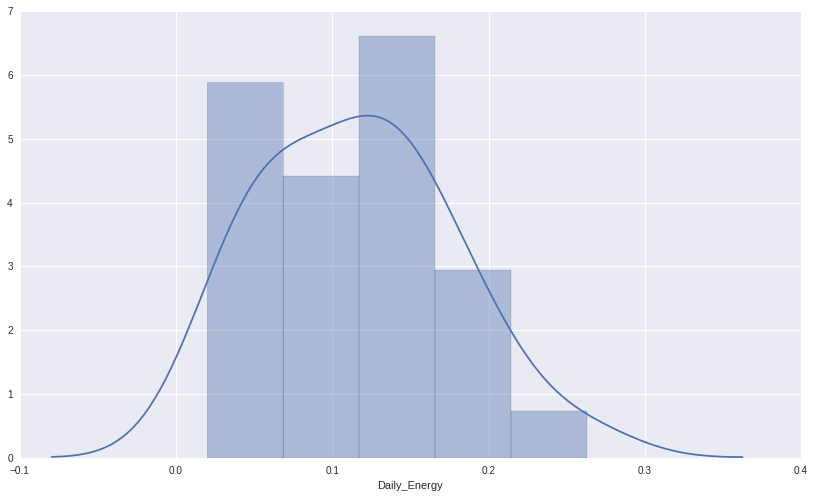

In [10]:
plt.figure(figsize=(14,8))
sns.distplot(df['Daily_Energy'])

## Further analysis will be needed on the different periods of the year in which slopes seem irregular. Possible explanations will be explored. **Many parts of this analysis need to be refined**